### BP神经网络构建逻辑
 - 输入x0，x1，x2，x0=1（偏置值）
 - 隐藏层y0，y1，y2，y3
 - 输出层O
   - 输入层和隐藏层之间得到12个权值（V）    
   - 输出层和隐藏层之间得到4个权值（W）

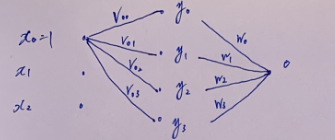

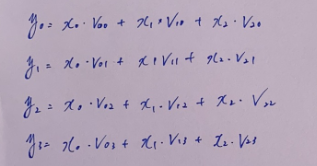

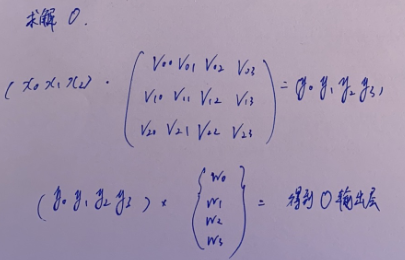

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#异或问题的4个输入
X = np.array([[1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])

#sigmoid的取值范围是（0,1）
Y = np.array([[0,1,1,0]])

#输入和隐藏中，输出和隐藏层中有2个权值V和W
#根据推导图片，V的形状（3,4），W的形状（4,1）
V = np.random.random((3,4))*2-1
W = np.random.random((4,1))*2-1
print(V)
print(W)
     
#设置学习率
lr = 0.11

#根据sigmoid函数和导数定义函数
def sigmoid(x):
    return 1/(1+np.exp(-x))
def dsigmoid(x):
    return x*(1-x)
def update():
    global X,Y,W,V,lr
    
    L1 = sigmoid(np.dot(X,V)) #隐藏层的输出（4,4）
    L2 = sigmoid(np.dot(L1,W)) #输出层的输出（4,1）
    
    #开始反向传播
    #（Y.T-L2）=第1次输出的结果和标签值进行比较后得到（a值）
    # a值 * sigmoid的导数得到A值
    # 然后这A值和权值进行相乘得到b个值
    # b值然后和L1的导数（隐藏层中输出）相乘得到B值
    # 完成反向传播
    L2_delta = (Y.T - L2)*dsigmoid(L2)
    L1_delta = L2_delta.dot(W.T)*dsigmoid(L1)
    
    #基于公式
    #△W = 学习率 * L1（隐藏层的输出） * A值
    #△V = 学习率 * X * B值
    W_C = lr*L1.T.dot(L2_delta)
    V_C = lr*X.T.dot(L1_delta)
    
    #通过累加△W和△V的值，可以得到新的W,V值
    W = W + W_C
    V = V + V_C

[[-0.692173   -0.20064159  0.72596511 -0.33400581]
 [-0.14582146  0.43055508  0.19953142  0.61486729]
 [ 0.39860908 -0.68947855 -0.40409992 -0.65925066]]
[[ 0.27605329]
 [-0.99377271]
 [ 0.46191212]
 [-0.7865794 ]]


In [17]:
for i in range(100000):
    update()#更新权值
    if i%500 == 0:
        L1 = sigmoid(np.dot(X,V))
        L2 = sigmoid(np.dot(L1,W))
        print('Error:',np.mean(np.abs(Y.T-L2))) #求误差，只取正数后的平均值

#最后一次L1和L2的值
L1 = sigmoid(np.dot(X,V))
L2 = sigmoid(np.dot(L1,W))
print(L2)

#将最终输出接近于0的变成0，接近1的变成1
def judge(x):
    if x>=0.5:
        return 1
    else:
        return 0
#使用map将L2的值传入judge函数中进行判断
#输出经过函数判断过的值
for i in map(judge,L2):
    print(i)

Error: 0.5009958797936738
Error: 0.500451816843204
Error: 0.5000767947495006
Error: 0.49987884630727836
Error: 0.4997184944085227
Error: 0.49952454620010195
Error: 0.4992014445675941
Error: 0.4985034027627343
Error: 0.4965087084302318
Error: 0.48863233791550936
Error: 0.4559923540963615
Error: 0.38143186085568254
Error: 0.2812881634751453
Error: 0.19596542455718935
Error: 0.14543062201419588
Error: 0.11576711853157197
Error: 0.09687881635732087
Error: 0.08391290459522016
Error: 0.07447614215654794
Error: 0.0672932564650933
Error: 0.061632559359604475
Error: 0.0570471432207279
Error: 0.053249535854012445
Error: 0.050046711300893235
Error: 0.04730432412250743
Error: 0.04492599169200917
Error: 0.04284075372568473
Error: 0.04099518814812461
Error: 0.039348288508925945
Error: 0.037868038515095875
Error: 0.03652906266937842
Error: 0.03531097839140968
Error: 0.03419721681634864
Error: 0.03317416370523512
Error: 0.03223052337232948
Error: 0.03135684079393409
Error: 0.030545137752248784
Error: 